In [2]:
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans

In [8]:
df = pd.read_csv('Mall_Customers (1).csv')

In [10]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
df.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

# check null value

In [18]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [20]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

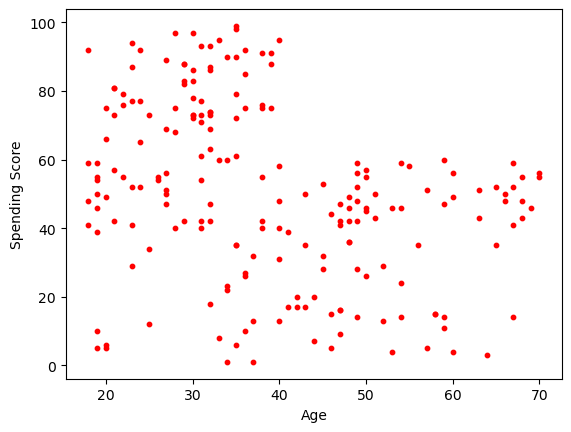

In [26]:
plt.scatter(df['Age'], df['Spending Score (1-100)'], s = 10, color = 'red')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

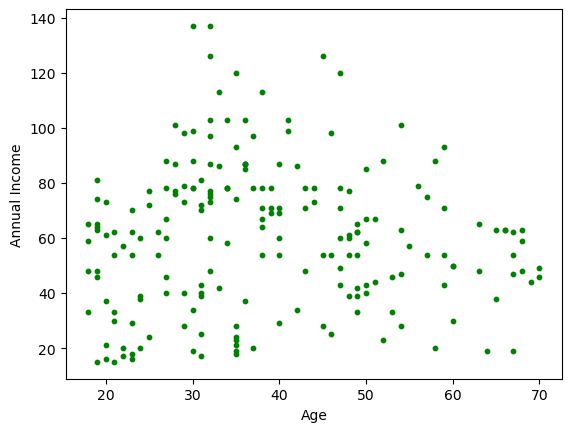

In [30]:
plt.scatter(df['Age'], df['Annual Income (k$)'], s = 10, color = 'green')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

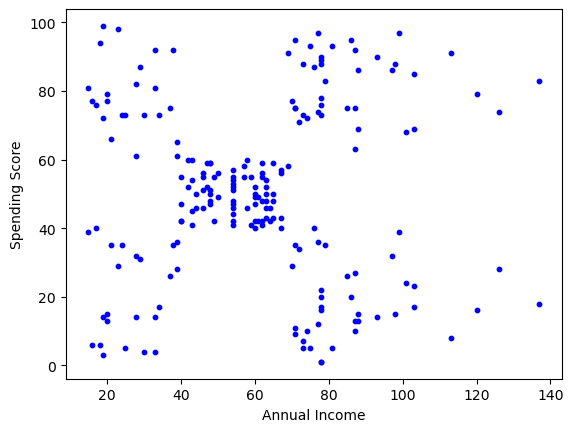

In [34]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], s = 10, color = 'blue')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [42]:
sse = []
for i in range(1, 10):
    km = KMeans(n_clusters =  i, n_init=10)
    km.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    sse.append(km.inertia_)

In [44]:
sse

[269981.2800000001,
 181363.59595959596,
 106348.3730621112,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30227.606513152015,
 24986.52564064288,
 21826.936303231654]

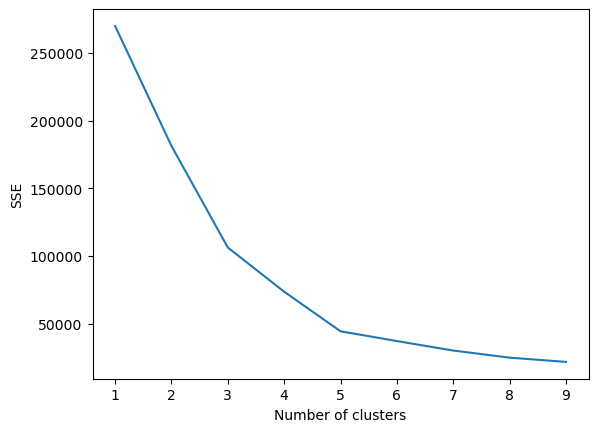

In [46]:
plt.xlabel('Number of clusters')
plt.ylabel("SSE")
plt.plot(range(1,10), sse)

In [50]:
km = KMeans(n_clusters = 5, n_init=10)
predicted = km.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
predicted

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [52]:
df['Cluster'] = predicted
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


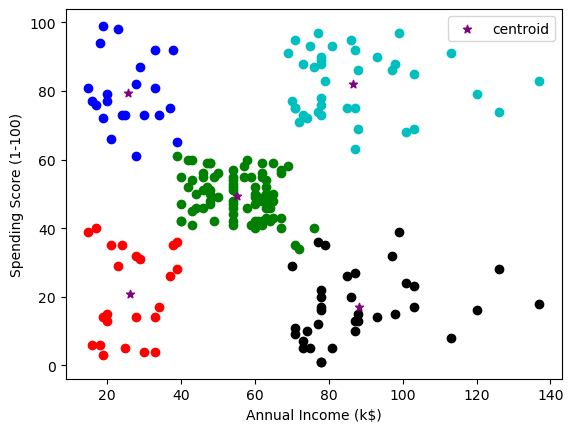

In [54]:
df1 = df[df.Cluster==0] 
df2 = df[df.Cluster==1] 
df3 = df[df.Cluster==2]
df4 = df[df.Cluster==3]
df5 = df[df.Cluster==4]

plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='black')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='c')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],
            color='purple',marker='*',label='centroid')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()